In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from datetime import *
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [3]:
df_train=pd.read_csv(r"C:\Users\Volkan ARIKAN\Desktop\Yeni klasör\datasets\train.csv")
df_test=pd.read_csv(r"C:\Users\Volkan ARIKAN\Desktop\Yeni klasör\datasets\test.csv")

In [55]:
df_train.describe()

,day,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature17,feature18,feature19,feature20,feature21,feature22,feature23,label,scaled_amount,scaled_time
count,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,...,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06,1.593096e+06
mean,1.006955e+01,6.689955e-01,-3.862559e-01,-4.647123e+00,1.209814e+00,-1.087373e+00,-2.398188e+00,-2.915917e+00,8.284381e-01,7.462028e-01,...,5.521867e-02,-2.048757e-02,2.534302e-04,3.582746e-02,-3.571109e-03,1.584437e-03,-1.953650e-05,7.488563e-04,1.578079e+00,-1.523028e-02
std,5.853351e+00,2.249707e-01,6.595848e-01,2.607791e+02,1.463007e+02,8.255196e+01,7.013880e+01,2.116848e+01,1.192170e+01,5.657757e+00,...,4.918814e-01,3.608977e-01,2.998384e-01,2.904410e-01,8.767027e-02,1.865325e-02,6.387089e-03,2.735500e-02,1.471329e+01,7.152374e-01
min,1.000000e+00,-4.100204e+01,-7.071017e+00,-1.519452e+03,-4.193289e+02,-1.908663e+02,-2.911816e+02,-7.087614e+01,-2.863034e+02,-1.778125e+01,...,-1.757402e+00,-2.692235e+00,-2.175965e+00,-8.445086e-01,-2.840772e-01,-7.215892e-02,-9.998269e-01,0.000000e+00,-2.710985e-01,-1.799299e+00
25%,5.000000e+00,5.256317e-01,-1.013863e+00,-3.465603e+01,-6.311738e+01,-9.713920e+01,-3.556981e+01,-9.673077e+00,2.784891e+00,-3.780683e+00,...,-4.677066e-02,-2.189355e-01,-5.461611e-02,-8.266937e-02,-7.934346e-03,-1.473359e-03,-4.349443e-05,0.000000e+00,-1.725601e-01,-4.982669e-01
50%,1.000000e+01,5.827561e-01,-8.815242e-01,2.130413e+01,6.157632e+00,6.669652e+00,-1.004331e+01,-3.457910e+00,3.547478e+00,2.459764e+00,...,-6.147472e-03,-2.000902e-02,-7.095152e-03,-1.455591e-02,-2.584419e-03,1.143956e-03,-7.458098e-06,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+01,7.408076e-01,3.221738e-01,1.150508e+02,1.292946e+02,7.122677e+01,4.867430e+01,-2.747842e+00,4.004814e+00,4.986462e+00,...,1.827838e-01,1.257709e-01,9.480538e-02,2.008575e-02,4.344108e-04,2.010147e-03,1.003685e-05,0.000000e+00,8.274399e-01,5.017331e-01
max,2.000000e+01,1.316803e+00,3.806139e-01,8.527823e+03,9.349109e+02,8.131643e+02,3.933989e+02,9.119850e+02,3.140034e+02,3.447934e+01,...,1.973987e+00,2.605600e+00,2.878023e+00,1.464760e+00,6.095311e-01,1.529016e-01,9.997212e-01,1.000000e+00,7.637636e+03,1.455881e+00


In [56]:
df_train.isnull().sum().max()

0

In [57]:
print('No Frauds', round(df_train['label'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train['label'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

No Frauds 99.93 % of the dataset
Frauds 0.07 % of the dataset


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df_train['amount'].values
time_val = df_train['time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [4]:
import datetime
df_train.time=pd.to_datetime(df_train['time'], format='%H:%M:%S')
df_test.time=pd.to_datetime(df_test['time'], format='%H:%M:%S')

In [5]:
my_list=[]
for i in range(0,len(df_train.time)):
    a=(df_train.time[i]-df_train.time[0]).total_seconds()
    my_list.append(a)

In [6]:
my_list2=[]
for i in range(0,len(df_test.time)):
    b=(df_test.time[i]-df_test.time[0]).total_seconds()
    my_list2.append(b)

In [7]:
df_train["elapsed_secs"]=my_list
df_test["elapsed_secs"]=my_list2

In [11]:
for i in df_train.columns[5:-2]:
    print(i, df_train[i].mean())

feature0 -100.77337914536936
feature1 170.0905206896437
feature2 -4.647122780495813
feature3 1.2098141704593088
feature4 -1.087373010949895
feature5 -2.398187988603559
feature6 -2.9159172873374692
feature7 0.8284381087704208
feature8 0.7462028485538434
feature9 -0.39558194193272
feature10 -0.040701958784969086
feature11 0.25451780009725034
feature12 0.07549149820402865
feature13 -0.16156888411205234
feature14 -0.02028525811044344
feature15 0.02707089781199107
feature16 -0.012861047133826905
feature17 0.055218673391995286
feature18 -0.0204875725059596
feature19 0.0002534301897225497
feature20 0.03582746082936393
feature21 -0.0035711090371229447
feature22 0.0015844366433880402
feature23 -1.953649702806689e-05


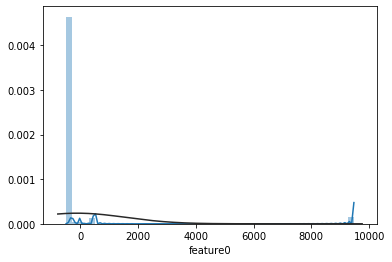

In [18]:
sns.distplot(df_train["feature0"],fit=norm)

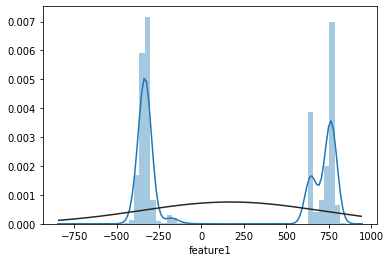

In [19]:
sns.distplot(df_train["feature1"],fit=norm)

In [31]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scaled_amount'] = rob_scaler.fit_transform(df_train['amount'].values.reshape(-1,1))
df_train['scaled_time'] = rob_scaler.fit_transform(df_train['elapsed_secs'].values.reshape(-1,1))
df_train["feature0"]=rob_scaler.fit_transform(df_train['feature0'].values.reshape(-1,1))
df_train["feature1"]=rob_scaler.fit_transform(df_train['feature1'].values.reshape(-1,1))

df_train.drop(['time','amount', 'elapsed_secs', 'transaction_id', 'card'], axis=1, inplace=True)


df_test['scaled_amount'] = rob_scaler.fit_transform(df_test['amount'].values.reshape(-1,1))
df_test['scaled_time'] = rob_scaler.fit_transform(df_test['elapsed_secs'].values.reshape(-1,1))
df_test["feature0"]=rob_scaler.fit_transform(df_test['feature0'].values.reshape(-1,1))
df_test["feature1"]=rob_scaler.fit_transform(df_test['feature1'].values.reshape(-1,1))

df_test.drop(['time','amount', 'elapsed_secs', 'transaction_id', 'card'], axis=1, inplace=True)

In [32]:
df_train[["label"]] *= 1
df_test[["label"]] *= 1

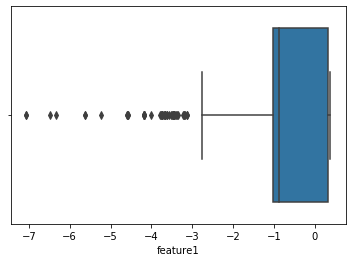

In [33]:
import scipy
df_train['feature1'],fitted_lambda= scipy.stats.boxcox(df_train.feature1-df_train.feature1.min()+0.01 ,lmbda=None)
sns.boxplot(df_train['feature1'])

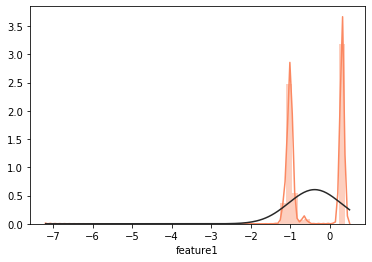

In [34]:
sns.distplot(df_train.feature1,fit=norm, color='#FB8861')

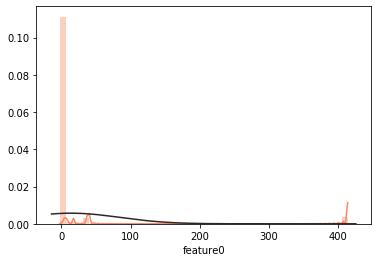

In [35]:
sns.distplot(df_train.feature0,fit=norm, color='#FB8861')

In [36]:
df_train['feature0'],fitted_lambda= scipy.stats.boxcox(df_train.feature0-df_train.feature0.min()+0.01 ,lmbda=None)

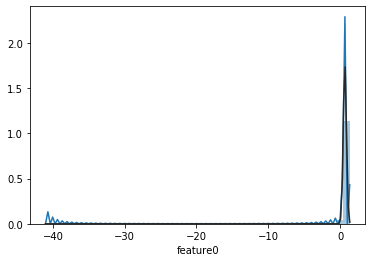

In [37]:
sns.distplot(df_train.feature0,fit=norm)

In [38]:
X = df_train.drop(['label'], axis = 1)
y = df_train.label

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(X,y)

In [40]:
Xt = df_test.drop(['label'], axis = 1)
yt = df_test.label

In [42]:
model = LogisticRegression(random_state=0).fit(x_sm, y_sm)
y_pred=model.predict(Xt)
confusion_matrix(yt,y_pred)

C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[764852,  37820],
       [   396,    254]], dtype=int64)

In [45]:
tpr_list1=[]
for i in np.arange(0, 1, 0.01):
    y_pred1 = (model.predict_proba(Xt)[:,1] >= i).astype(bool)
    tn, fp, fn, tp = confusion_matrix(yt, y_pred1).ravel()
    tpr=fp/tp
    tpr_list1.append(tpr)
    print(i,tpr)

0.0 1234.88
0.01 1049.3152
0.02 925.1071428571429
0.03 771.0212418300654
0.04 700.2305084745763
0.05 620.3031358885017
0.06 550.481684981685
0.07 492.99808429118775
0.08 442.85854616895875
0.09 395.86653386454185
0.1 355.1460446247464
0.11 326.0741525423729
0.12 292.44967880085653
0.13 270.14977973568284
0.14 257.53333333333336
0.15 254.375
0.16 244.90656565656565
0.17 233.28826530612244
0.18 223.4315245478036
0.19 219.75871313672923
0.2 211.9291553133515
0.21 201.99455040871933
0.22 193.85558583106268
0.23 188.65384615384616
0.24 183.12637362637363
0.25 180.595567867036
0.26 180.55211267605634
0.27 178.94617563739376
0.28 179.3793103448276
0.29 177.36494252873564
0.3 175.20114942528735
0.31 173.71676300578034
0.32 170.89884393063585
0.33 167.55780346820808
0.34 165.44476744186048
0.35000000000000003 164.12058823529412
0.36 163.17910447761193
0.37 160.64864864864865
0.38 157.85800604229607
0.39 155.97859327217125
0.4 155.0
0.41000000000000003 154.66134185303514
0.42 155.5115511551155
0

C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  """


0.97 inf


C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  """


0.98 inf
0.99 inf


C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  """


In [47]:
y_pred2 = (model.predict_proba(Xt)[:,1] >= 0.89).astype(bool)
confusion_matrix(yt,y_pred2)

array([[802042,    630],
       [   628,     22]], dtype=int64)

In [91]:
tn, fp, fn, tp = confusion_matrix(yt, y_pred2).ravel()

In [92]:
DR=tp/(tp+fn)
print(DR)

0.033846153846153845


Text(0, 0.5, 'TPR')

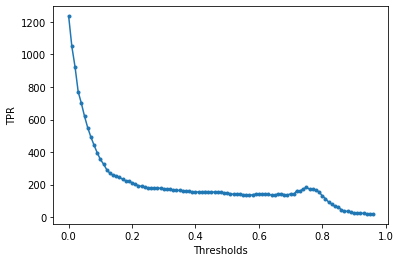

In [52]:
from matplotlib import pyplot as plt
plt.plot(np.arange(0, 1, 0.01),tpr_list1 ,marker='.')

plt.xlabel("Thresholds")
plt.ylabel("TPR")

In [53]:
y_pred_final = model.predict_proba(Xt)

In [67]:
df_test2=pd.read_csv(r"C:\Users\Volkan ARIKAN\Desktop\Yeni klasör\datasets\test.csv")

In [93]:
df = pd.DataFrame(y_pred_final[:,1], columns=['score'])

In [94]:
df_final_scores=pd.concat([df_test2.transaction_id, df], axis=1)

In [95]:
df_final_scores.head()

,transaction_id,score
0,1488269,0.096996
1,1488270,0.100812
2,1488271,0.176148
3,1488272,0.663338
4,1488273,0.663351
